In [169]:
import pandas as pd
df = pd.read_csv("water_potability.csv")

In [170]:
print("First 5 Rows of the Dataset:")
print(df.head())

First 5 Rows of the Dataset:
         ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0  


In [171]:
# Get dataset shape (rows, columns)
print(f"Dataset Shape: {df.shape[0]} rows, {df.shape[1]} columns")


Dataset Shape: 3276 rows, 10 columns


In [172]:
# Display column names and data types
print("\nColumn Names and Data Types:")
print(df.dtypes)



Column Names and Data Types:
ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object


In [173]:
# Dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


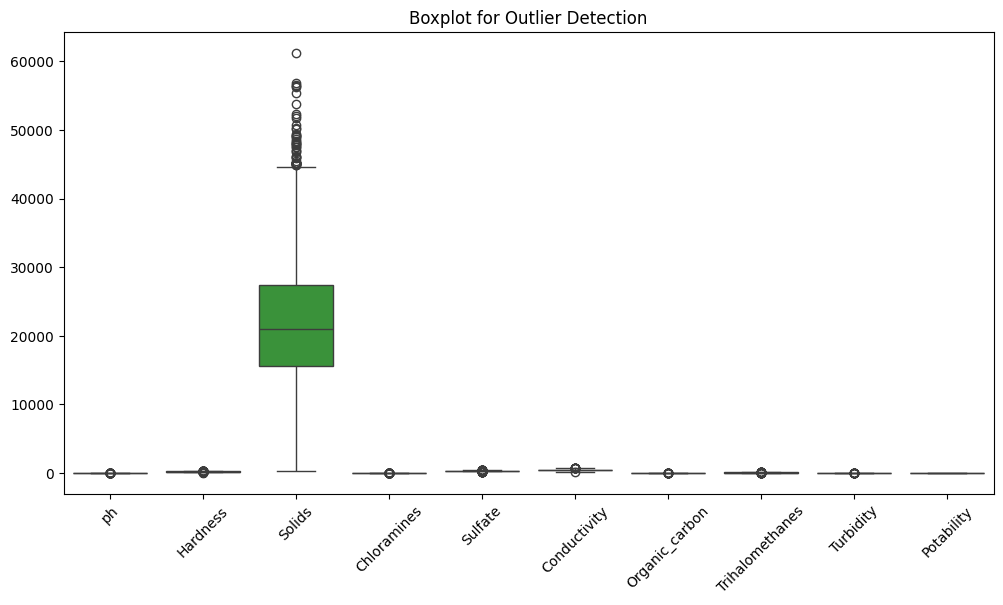

In [174]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot to visualize outliers
plt.figure(figsize=(12,6))
sns.boxplot(data=df)
plt.title("Boxplot for Outlier Detection")
plt.xticks(rotation=45)
plt.show()


In [175]:
import numpy as np
df_outliers = pd.DataFrame(df.loc[:,])
# Define IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Filter out the outliers by using IQR method, only keep the valid data
for i, j in zip(np.where(df_outliers > Q3 + 1.5 * IQR)[0], np.where(df_outliers > Q3 + 1.5 * IQR)[1]):
  whisker  = Q3 + 1.5 * IQR
  df_outliers.iloc[i,j] = whisker[j]

# Replace every outlier on the lower side by the lower whisker - for 'water' column
for i, j in zip(np.where(df_outliers < Q1 - 1.5 * IQR)[0], np.where(df_outliers < Q1 - 1.5 * IQR)[1]):
  whisker  = Q1 - 1.5 * IQR
  df_outliers.iloc[i,j] = whisker[j]

df_outliers.shape

# Print new shape after removing outliers
print(f"\nDataset shape after removing outliers: {df_outliers.shape}")



Dataset shape after removing outliers: (3276, 10)


C:\Users\Hp\AppData\Local\Temp\ipykernel_19572\2339777700.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_outliers.iloc[i,j] = whisker[j]
C:\Users\Hp\AppData\Local\Temp\ipykernel_19572\2339777700.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_outliers.iloc[i,j] = whisker[j]
C:\Users\Hp\AppData\Local\Temp\ipykernel_19572\2339777700.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_outliers.iloc[i,j] = whisker[j

In [176]:
# Remove outliers columns
df.drop(columns= df.loc[:,], inplace=True)

In [177]:
# Concat the cleaned data with the outliers data
df = pd.concat([df, df_outliers], axis=1)
df.shape

(3276, 10)

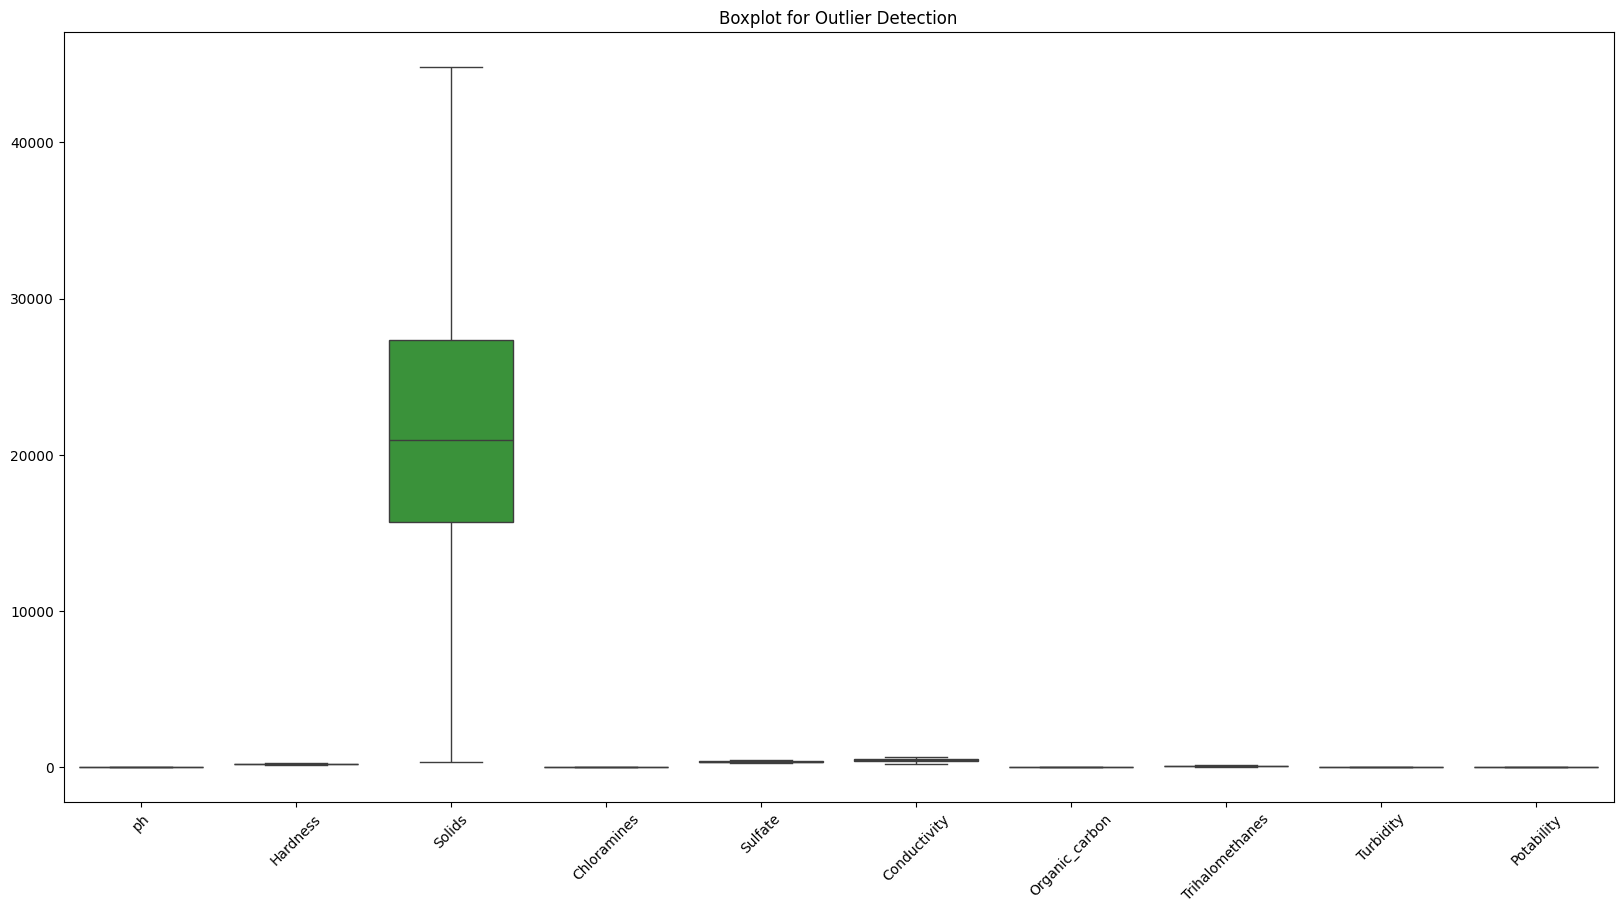

In [178]:
# Boxplot to visualize outliers
plt.figure(figsize=(20,10))
sns.boxplot(data=df)
plt.title("Boxplot for Outlier Detection")
plt.xticks(rotation=45)
plt.show()

In [179]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [180]:
df.dropna(inplace=True)
df.to_csv("cleaned_data.csv", index=False)
df.shape
          

(2011, 10)

In [181]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Print new shape after removing duplicates
print(f"\nNew dataset shape after removing duplicates: {df.shape}")



New dataset shape after removing duplicates: (2011, 10)


In [182]:
# Fill missing values with the median of each column
df.fillna(df.median(), inplace=True)

# Check again if missing values are handled
print("\nMissing Values After Cleaning:")






Missing Values After Cleaning:


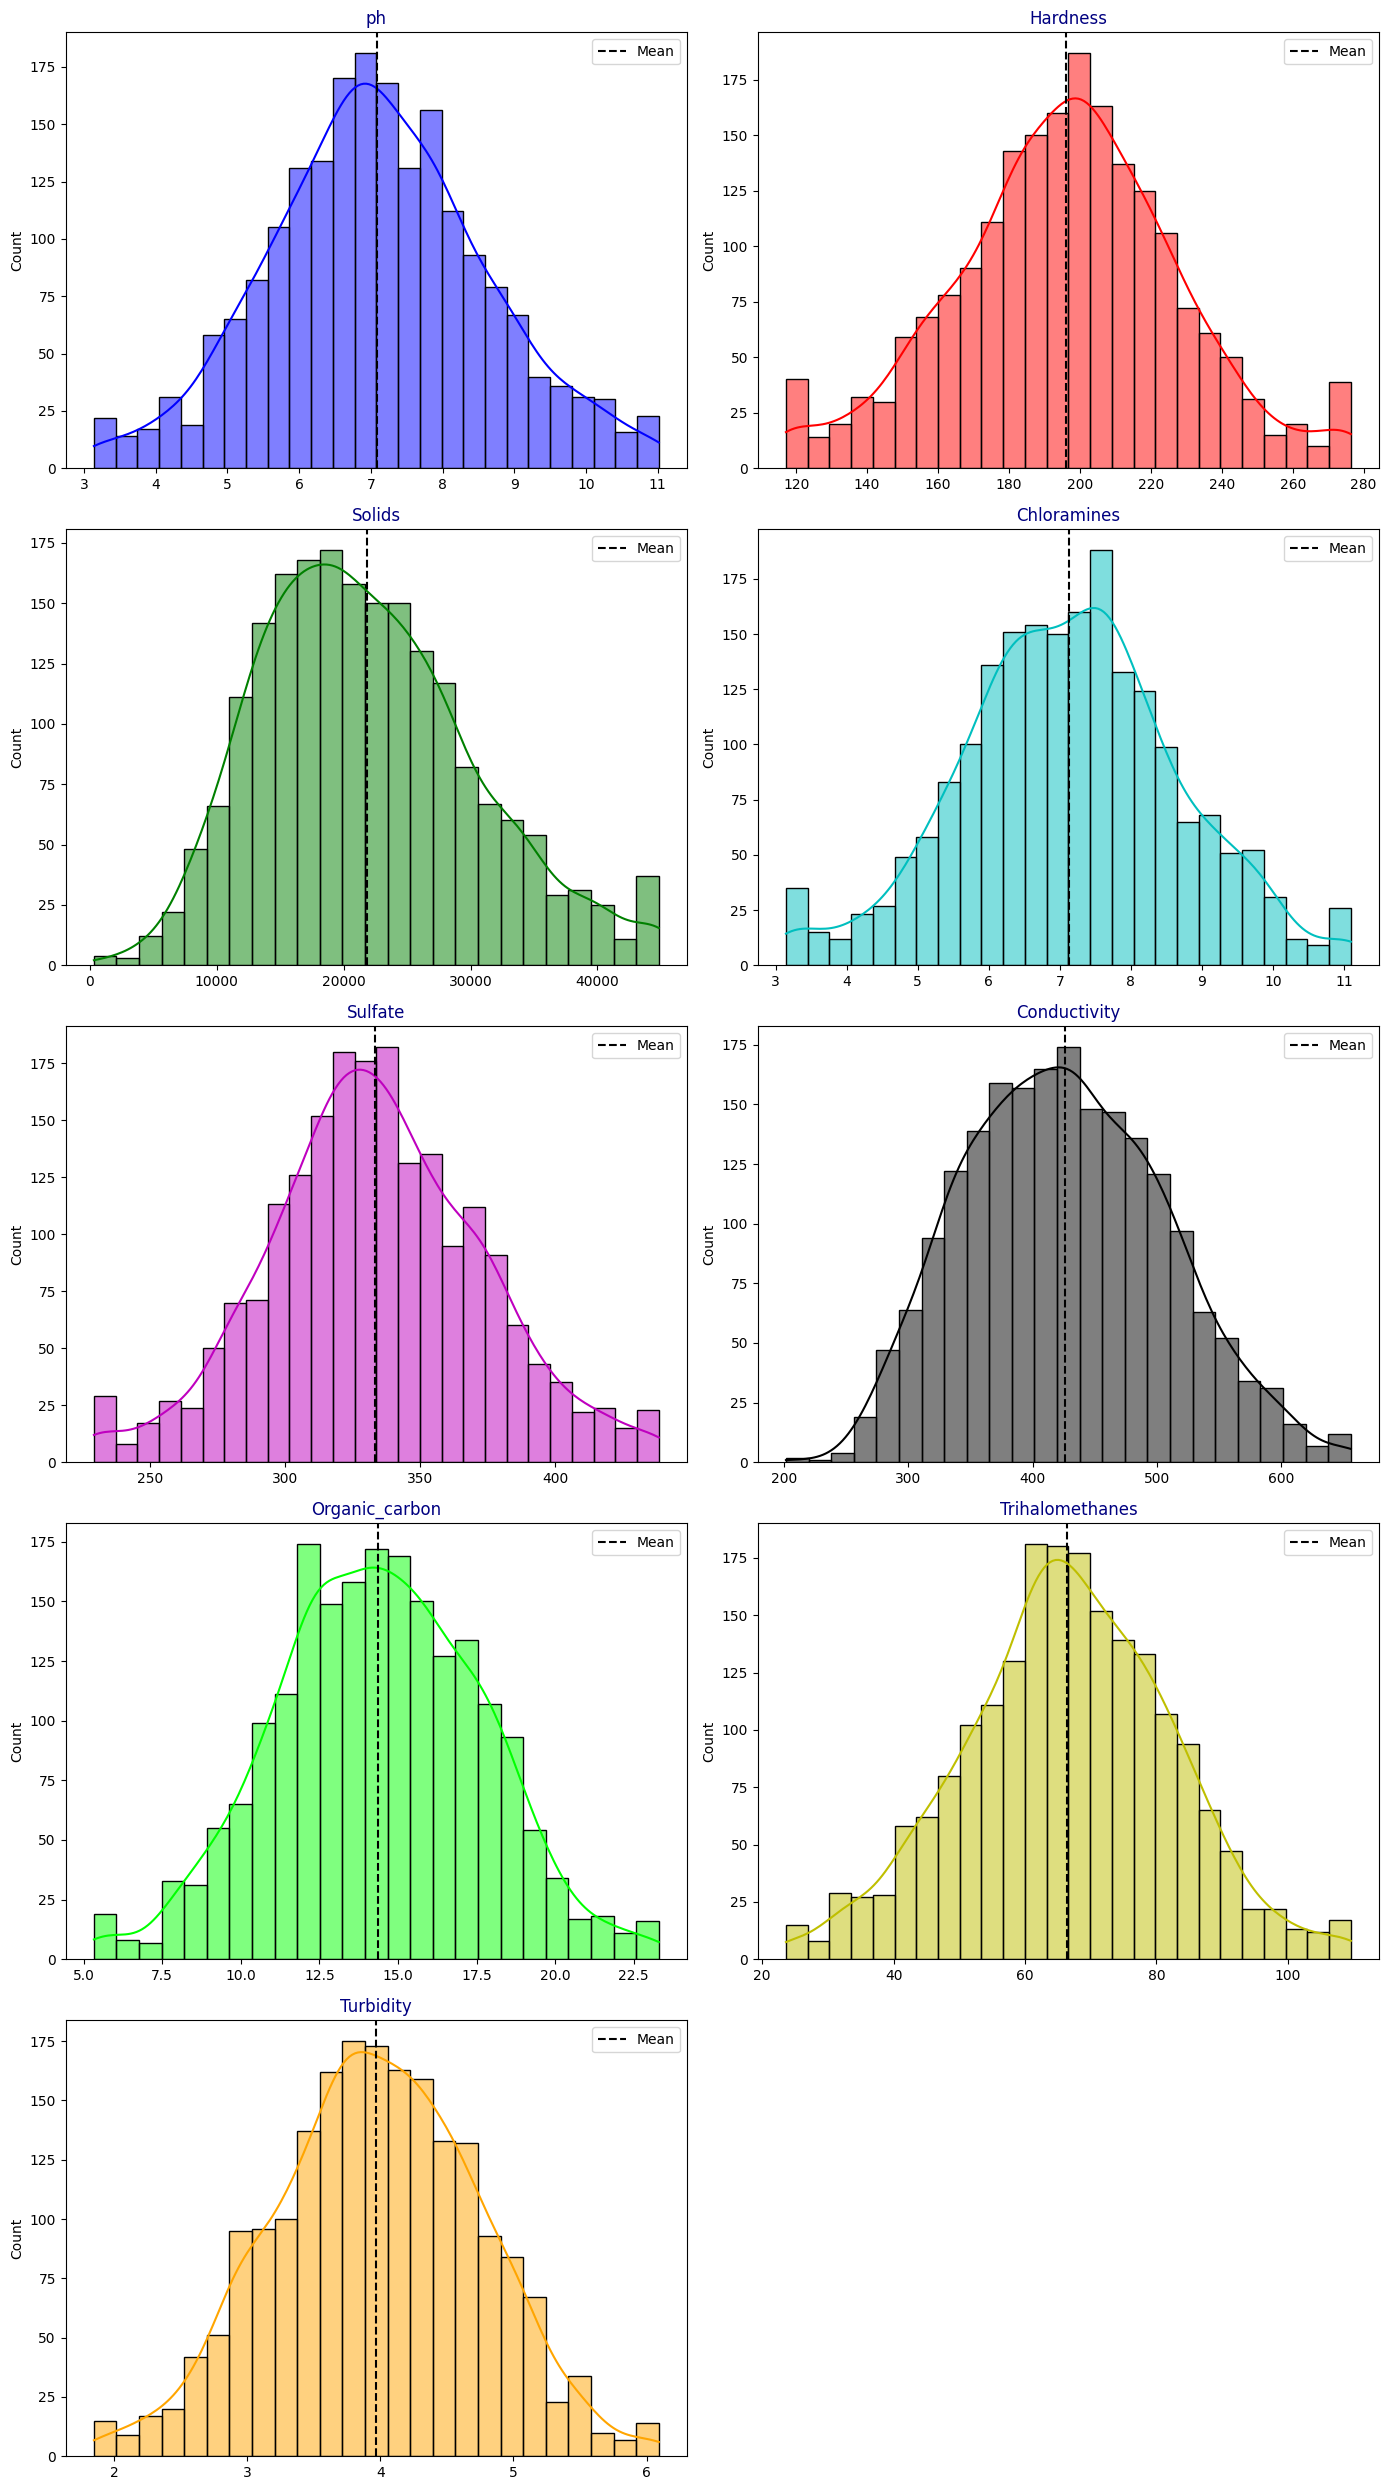

In [183]:
import itertools


# Visualize Distributions 
cols = [col for col in df.columns if col != "Potability"]  # Exclude target variable
length = len(cols)
cs = ["b", "r", "g", "c", "m", "k", "lime", "y", "orange"]  # Colors for plots

fig = plt.figure(figsize=(14, 25))

for i, j, k in itertools.zip_longest(cols, range(length), cs):
    plt.subplot(5, 2, j + 1)
    ax = sns.histplot(df[i], color=k, kde=True)  # Using histplot instead of distplot (deprecated)
    ax.set_facecolor("w")
    plt.axvline(df[i].mean(), linestyle="dashed", label="Mean", color="k")
    plt.legend(loc="best")
    plt.title(i, color="navy")
    plt.xlabel("")

plt.tight_layout()
plt.show()


In [184]:
# Summary statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ph,2011.0,7.087083,1.534158,3.139631,6.089723,7.027297,8.052969,11.015527
Hardness,2011.0,196.059193,31.913049,117.125160,176.744938,197.191839,216.441070,276.392834
Solids,2011.0,21872.334192,8503.069452,320.942611,15615.665390,20933.512750,27182.587067,44831.869873
Chloramines,2011.0,7.131854,1.547518,3.146221,6.138895,7.143907,8.109726,11.096086
Sulfate,2011.0,333.351809,40.117802,229.323489,307.632511,332.232177,359.330555,438.326179
Conductivity,2011.0,426.418654,80.361899,201.619737,366.680307,423.455906,482.373169,655.879140
Organic_carbon,2011.0,14.357587,3.305421,5.328026,12.124105,14.322019,16.683049,23.295427
Trihalomethanes,2011.0,66.406670,15.908619,23.605130,55.952664,66.542198,77.291925,109.576879
Turbidity,2011.0,3.969527,0.775907,1.848797,3.442915,3.968177,4.514175,6.091233
Potability,2011.0,0.403282,0.490678,0.000000,0.000000,0.000000,1.000000,1.000000


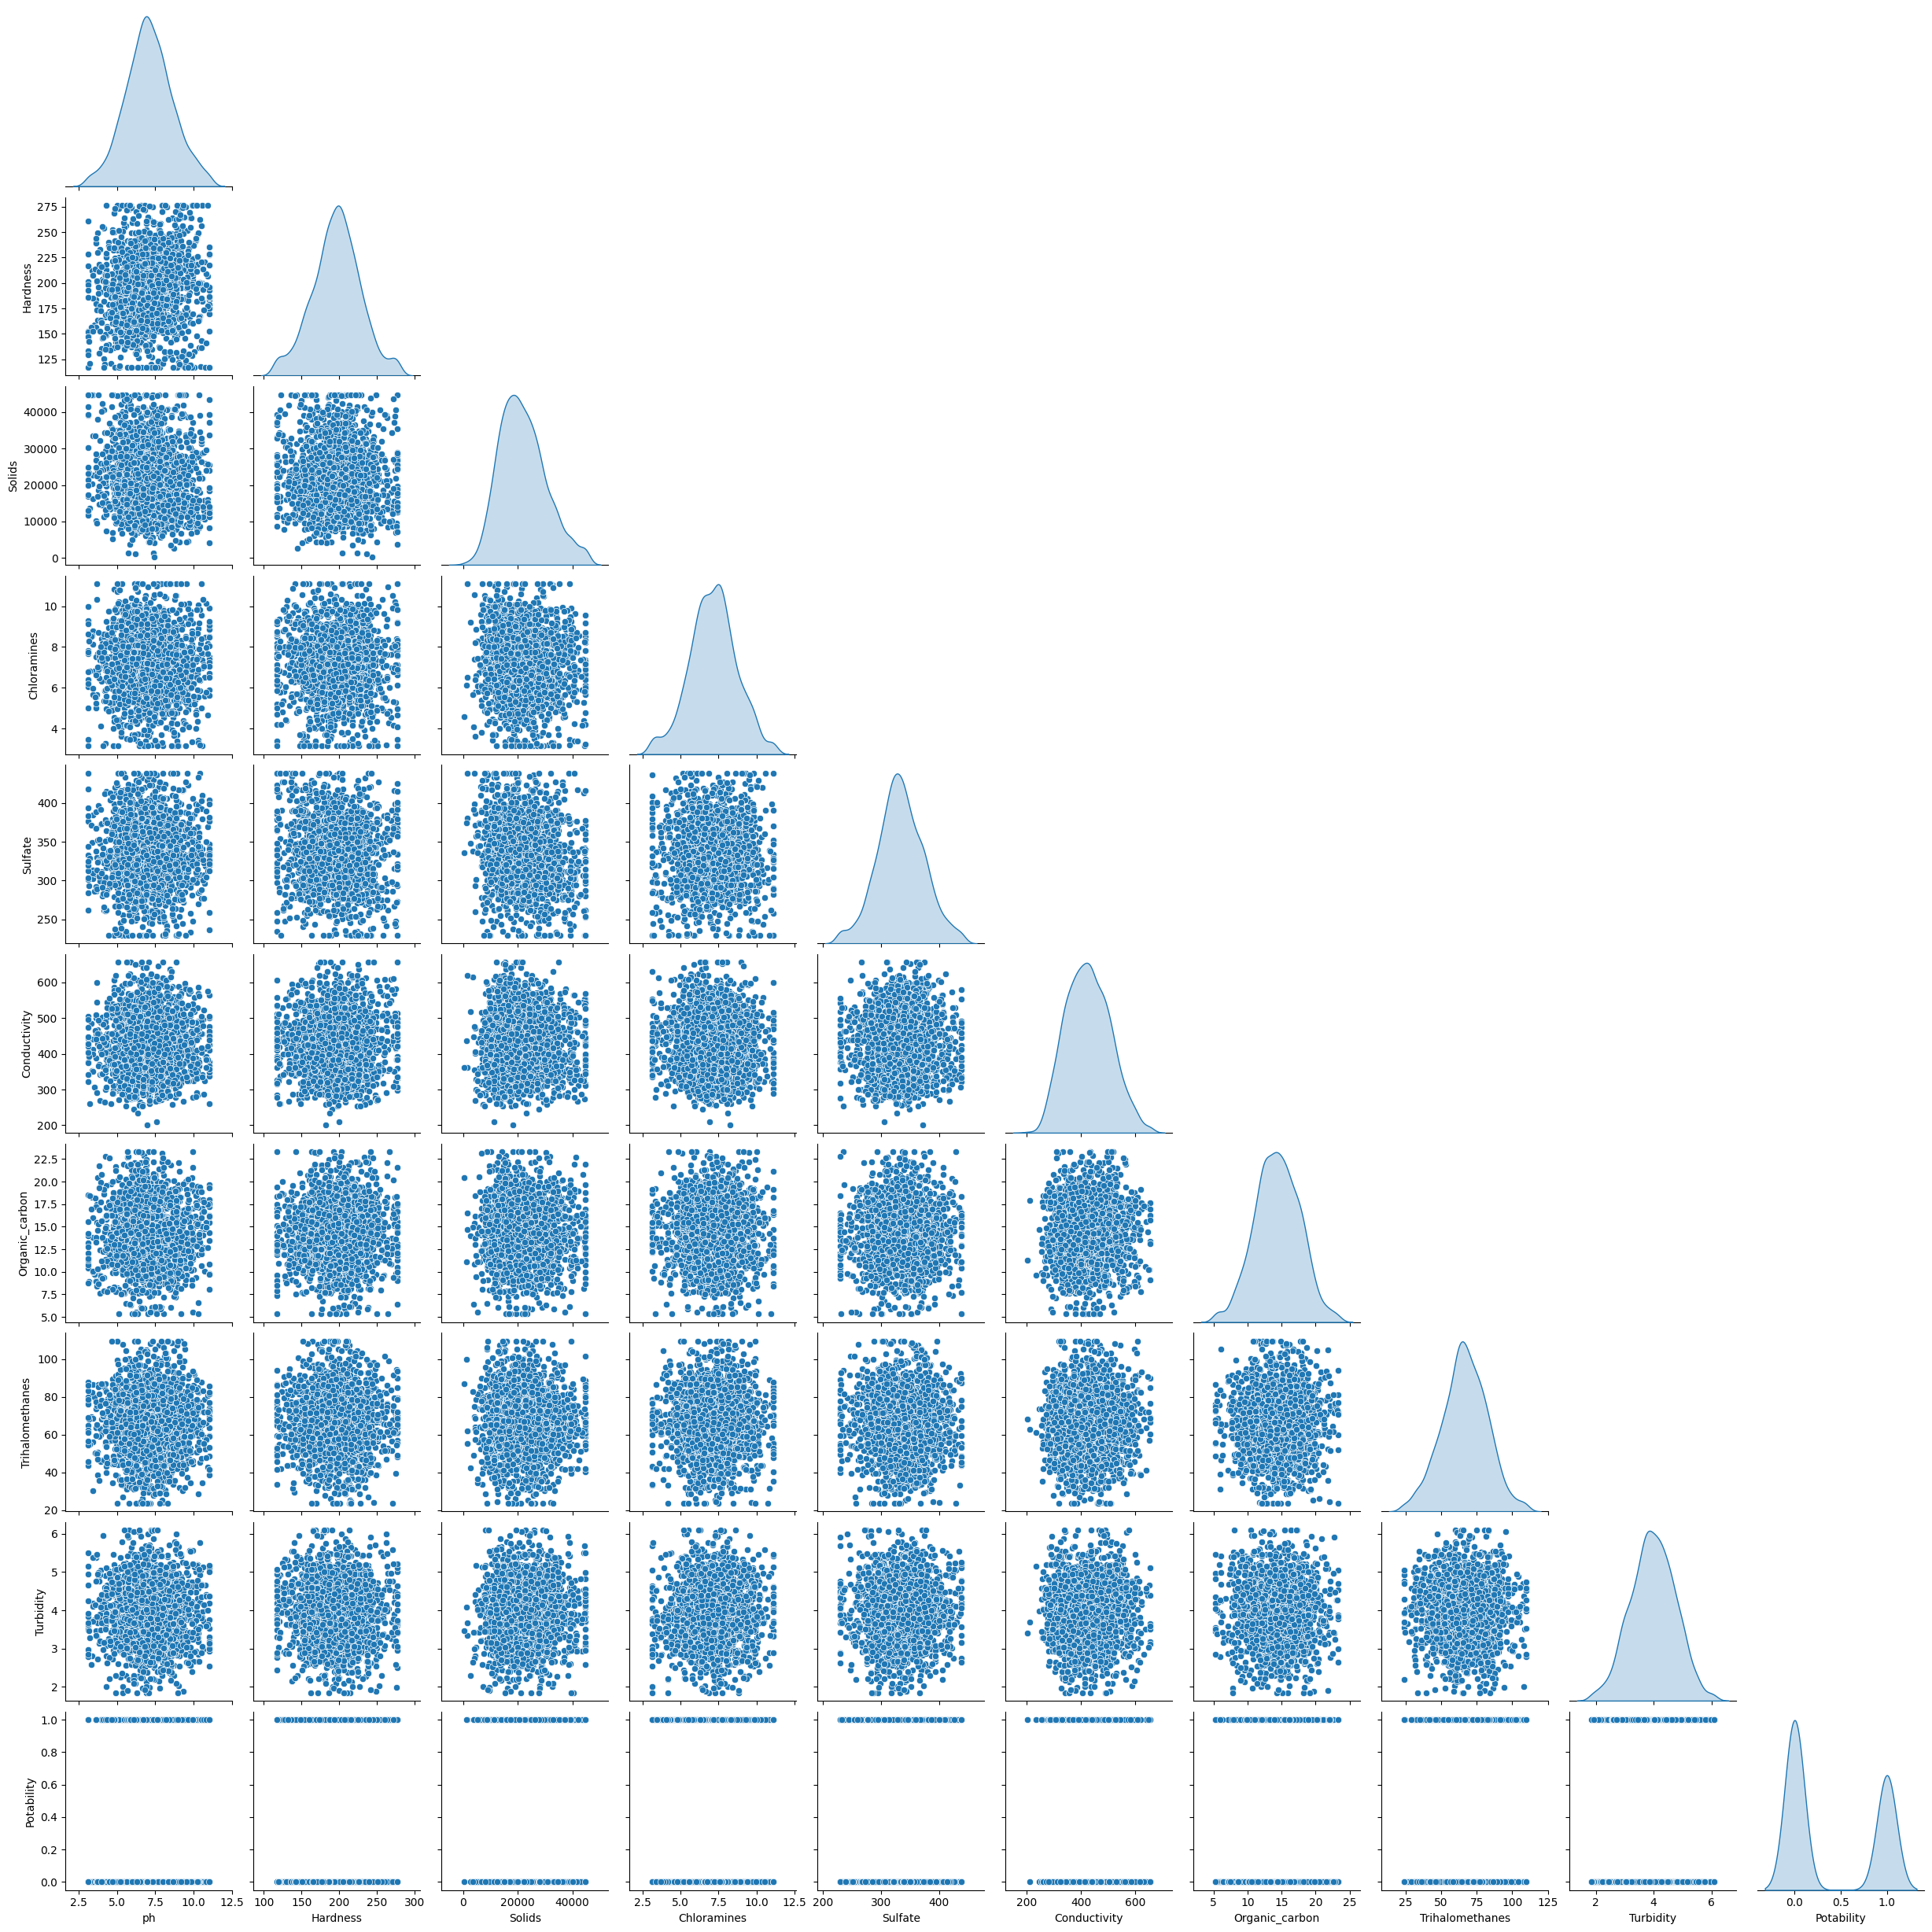

In [185]:
sns.pairplot(df, diag_kind = 'kde', corner = True);

In [186]:
# Check the Correlation
df.corr()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.114445,-0.088963,-0.029730,0.011031,0.013817,0.025303,0.016640,-0.034179,0.017843
Hardness,0.114445,1.000000,-0.050893,-0.022907,-0.105291,0.011552,0.012760,-0.016721,-0.036529,0.001340
Solids,-0.088963,-0.050893,1.000000,-0.052315,-0.153091,-0.006066,-0.003790,-0.017399,0.021315,0.038992
Chloramines,-0.029730,-0.022907,-0.052315,1.000000,0.015499,-0.029423,-0.020864,0.012184,0.012215,0.019229
Sulfate,0.011031,-0.105291,-0.153091,0.015499,1.000000,-0.014077,0.022541,-0.022750,-0.007538,-0.012505
Conductivity,0.013817,0.011552,-0.006066,-0.029423,-0.014077,1.000000,0.015335,0.004794,0.012707,-0.014994
Organic_carbon,0.025303,0.012760,-0.003790,-0.020864,0.022541,0.015335,1.000000,-0.005059,-0.015891,-0.014770
Trihalomethanes,0.016640,-0.016721,-0.017399,0.012184,-0.022750,0.004794,-0.005059,1.000000,-0.020829,0.008987
Turbidity,-0.034179,-0.036529,0.021315,0.012215,-0.007538,0.012707,-0.015891,-0.020829,1.000000,0.022169
Potability,0.017843,0.001340,0.038992,0.019229,-0.012505,-0.014994,-0.014770,0.008987,0.022169,1.000000


In [188]:
# Get dataset shape (rows, columns)
print(f"Dataset Shape: {df.shape[0]} rows, {df.shape[1]} columns")


Dataset Shape: 2011 rows, 10 columns


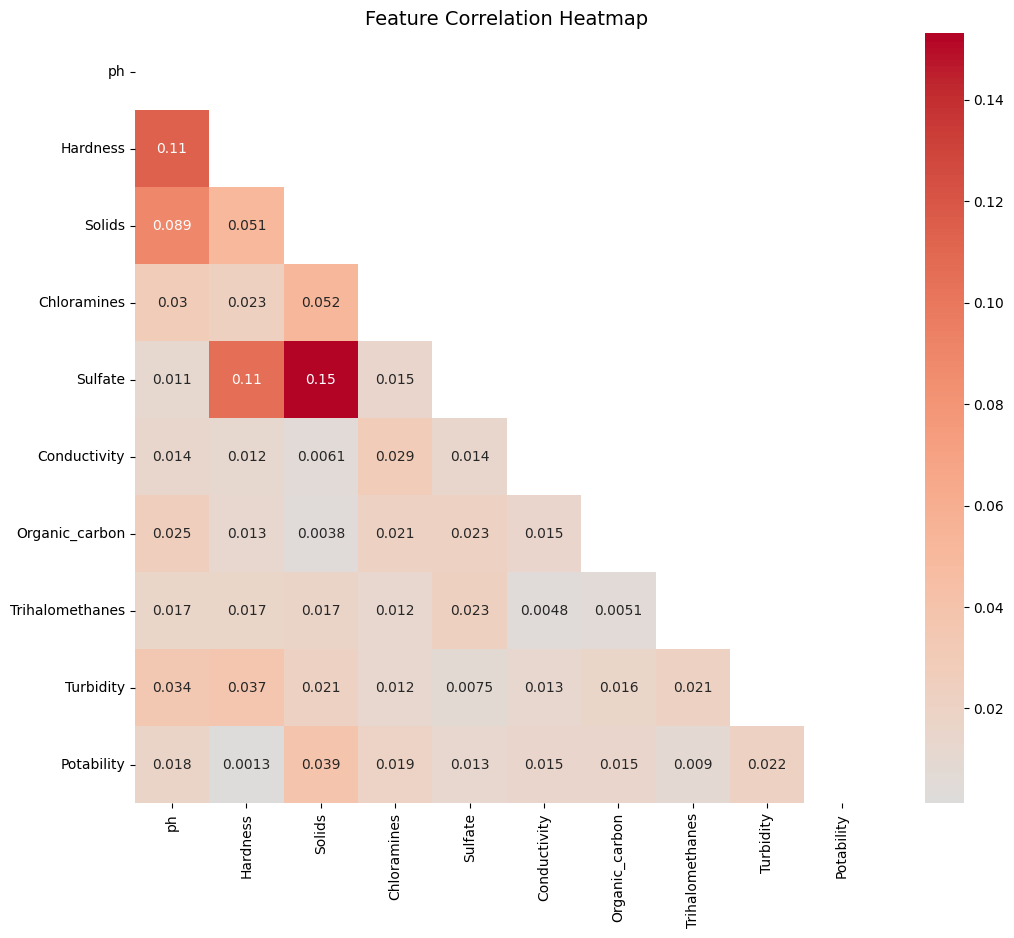

In [187]:
import numpy as np

# Compute absolute correlation matrix
corr = abs(df.corr())

# Select only the lower triangle of the correlation matrix
lower_triangle = np.tril(corr, k=-1)  # Keeps lower triangle, sets upper to 0

# Create a mask for the upper triangle
mask = lower_triangle == 0  

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, mask=mask, cmap='coolwarm', center=0)


plt.title("Feature Correlation Heatmap", fontsize=14)
plt.show()


Summary of Exploratory Data Analysis (EDA) for Water Potability Dataset

Except for the pH, Hardness, Solids, and Conductivity features, all other features have a very weak relationship with the Potability feature and do not significantly contribute to statistical decisions based on correlation.

The pH feature has a Low Positive Correlation with Hardness and Conductivity, suggesting that a combined feature like (pH + Hardness) might improve water potability predictions.

The Solids feature has a Low Positive Correlation with Conductivity, indicating that an additional feature like (Solids + Conductivity) could be useful for modeling.

The Organic Carbon feature has a Low Positive Correlation with Turbidity, suggesting a possible interaction effect between these two variables.

Based on clustering analysis, the range of clusters in this dataset is between 2 to 5, which may indicate different groups of water quality levels.







